In [1]:

import pandas as pd
import numpy as np
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')
home_directory = os.path.expanduser("~")
omnetpp_directory = os.path.join(home_directory, "omnetpp-6.0.2")
vec_directory = os.path.join(omnetpp_directory, "samples", "thesis", "results")

In [3]:
dispatchingAlgos = ["Greedy2", "Greedy2", "Proposed", "Proposed2"]
schedulingAlgos = ["FIFO", "EDF", "EDF", "EDF"]

numUsers = [user for user in range(2000, 3001 , 100)]
repetition = 1
for idx, dispatchingAlgo in enumerate(dispatchingAlgos):
    for numUser in numUsers:
        for i in range(repetition):
            command_vec = f"{omnetpp_directory}/bin/opp_scavetool export -F CSV-R -o {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}-vec.csv {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}.vec"
            command_sca = f"{omnetpp_directory}/bin/opp_scavetool export -F CSV-R -o {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}-sca.csv {vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}.sca"
            os.system(command_vec)
            os.system(command_sca)


Exported 181 vectors
Exported 9 scalars, 31326 parameters
Exported 181 vectors
Exported 9 scalars, 32826 parameters
Exported 181 vectors
Exported 9 scalars, 34326 parameters
Exported 181 vectors
Exported 9 scalars, 35826 parameters
Exported 181 vectors
Exported 9 scalars, 37326 parameters
Exported 181 vectors
Exported 9 scalars, 38826 parameters
Exported 181 vectors
Exported 9 scalars, 40326 parameters
Exported 181 vectors
Exported 9 scalars, 41826 parameters
Exported 181 vectors
Exported 9 scalars, 43326 parameters
Exported 181 vectors
Exported 9 scalars, 44826 parameters
Exported 181 vectors
Exported 9 scalars, 46326 parameters
Exported 181 vectors
Exported 9 scalars, 31326 parameters
Exported 181 vectors
Exported 9 scalars, 32826 parameters
Exported 181 vectors
Exported 9 scalars, 34326 parameters
Exported 181 vectors
Exported 9 scalars, 35826 parameters
Exported 181 vectors
Exported 9 scalars, 37326 parameters
Exported 181 vectors
Exported 9 scalars, 38826 parameters
Exported 181 v

In [4]:

algoCompletionRate = []
algoCompletionTime = []
algoTotalReward = []

for idx, dispatchingAlgo in enumerate(dispatchingAlgos):
    completionRateWithDiffNumUsers = []
    completionTimeWithDiffNumUsers = []
    rewardWithDiffNumUsers = []
    for numUser in numUsers:
        accumulateCompletionRate = 0
        accumulateCompletionTime = 0
        accumulateReward = 0
        for i in range(repetition):
            sca_out = pd.read_csv(f"{vec_directory}/General-numUsers={numUser},dispatchingAlgo={dispatchingAlgo},schedulingAlgo={schedulingAlgos[idx]}-#{i}-sca.csv")
            # print(f"{dispatchingAlgo}-{schedulingAlgos[idx]}-{numUser}-{i}")
            # if i == 0:
            #     display(sca_out[(sca_out['type'] == 'scalar')])
            sca_mean_row = sca_out[(sca_out['type'] == 'scalar') & (sca_out['name'] == 'isCompleted:mean')]
            sca_mean_row = sca_out[(sca_out['type'] == 'scalar')]
            accumulateCompletionRate += float(sca_mean_row[sca_mean_row['name'] == 'isCompleted:mean'].iloc[0]['value'])
            accumulateCompletionTime += float(sca_mean_row[sca_mean_row['name'] == 'totalTime:mean'].iloc[0]['value'])
            accumulateReward += float(sca_mean_row[sca_mean_row['name'] == 'totalReward:sum'].iloc[0]['value'])
        avgCompletionRate = accumulateCompletionRate / repetition
        avgCompletionTime = accumulateCompletionTime / repetition
        avgReward = accumulateReward / repetition
        completionRateWithDiffNumUsers.append(avgCompletionRate)
        completionTimeWithDiffNumUsers.append(avgCompletionTime)
        rewardWithDiffNumUsers.append(avgReward)
    algoCompletionRate.append(completionRateWithDiffNumUsers)
    algoCompletionTime.append(completionTimeWithDiffNumUsers)
    algoTotalReward.append(rewardWithDiffNumUsers)


# Define the maximum width for each variable
dispatching_width = 10
scheduling_width = 5
completion_rate_width = 5

for idx in range(len(dispatchingAlgos)):
    print(f"{dispatchingAlgos[idx]:<{dispatching_width}}-{schedulingAlgos[idx]:<{scheduling_width}} completionRate is ", end="")
    for j in range(len(numUsers)):
        print(f"{algoCompletionRate[idx][j]:.6f}", end=" ")
    print()

print()
for idx in range(len(dispatchingAlgos)):
    print(f"{dispatchingAlgos[idx]:<{dispatching_width}}-{schedulingAlgos[idx]:<{scheduling_width}} completionTime is ", end="")
    for j in range(len(numUsers)):
        print(f"{algoCompletionTime[idx][j]:.6f}", end=" ")
    print()

print()
for idx in range(len(dispatchingAlgos)):
    print(f"{dispatchingAlgos[idx]:<{dispatching_width}}-{schedulingAlgos[idx]:<{scheduling_width}} reward is ", end="")
    for j in range(len(numUsers)):
        print(f"{algoTotalReward[idx][j]}", end=" ")
    print()



Greedy2   -FIFO  completionRate is 0.941003 0.920622 0.894960 0.865386 0.835120 0.804507 0.775790 0.747820 0.722371 0.697605 0.674831 
Greedy2   -EDF   completionRate is 0.941003 0.920622 0.894960 0.865386 0.835120 0.804506 0.775787 0.747821 0.722374 0.697607 0.674833 
Proposed  -EDF   completionRate is 0.957483 0.936508 0.906504 0.872553 0.839028 0.806515 0.776855 0.748563 0.722779 0.698097 0.675160 
Proposed2 -EDF   completionRate is 0.962396 0.941485 0.909145 0.873761 0.839359 0.806799 0.777110 0.748664 0.722945 0.698186 0.675108 

Greedy2   -FIFO  completionTime is 0.064655 0.067637 0.070867 0.074055 0.076948 0.079764 0.082091 0.084464 0.086559 0.088600 0.090311 
Greedy2   -EDF   completionTime is 0.064650 0.067633 0.070858 0.074052 0.076946 0.079760 0.082076 0.084460 0.086544 0.088592 0.090301 
Proposed  -EDF   completionTime is 0.055558 0.060417 0.065651 0.069819 0.073424 0.076331 0.078855 0.081251 0.083128 0.085054 0.086750 
Proposed2 -EDF   completionTime is 0.051135 0.056933 0

In [5]:
import pandas as pd

completion_rate_data = {}
for idx, completion_rate in enumerate(algoCompletionRate):
    algo_key = f"{dispatchingAlgos[idx]}-{schedulingAlgos[idx]}"
    completion_rate_data[algo_key] = completion_rate

completion_rate_df = pd.DataFrame(completion_rate_data, index=numUsers).transpose()
display(completion_rate_df)
completion_rate_df.to_csv(f"{vec_directory}/completion_rate.csv")


completion_time_data = {}
for idx, completion_time in enumerate(algoCompletionTime):
    algo_key = f"{dispatchingAlgos[idx]}-{schedulingAlgos[idx]}"
    completion_time_data[algo_key] = completion_time

completion_time_df = pd.DataFrame(completion_time_data, index=numUsers).transpose()
display(completion_time_df)
completion_time_df.to_csv(f"{vec_directory}/completion_time.csv")

,2000,2100,2200,2300,2400,2500,2600,2700,2800,2900,3000
Greedy2-FIFO,0.941003,0.920622,0.894960,0.865386,0.835120,0.804507,0.775790,0.747820,0.722371,0.697605,0.674831
Greedy2-EDF,0.941003,0.920622,0.894960,0.865386,0.835120,0.804506,0.775787,0.747821,0.722374,0.697607,0.674833
Proposed-EDF,0.957483,0.936508,0.906504,0.872553,0.839028,0.806515,0.776855,0.748563,0.722779,0.698097,0.675160
Proposed2-EDF,0.962396,0.941485,0.909145,0.873761,0.839359,0.806799,0.777110,0.748664,0.722945,0.698186,0.675108


,2000,2100,2200,2300,2400,2500,2600,2700,2800,2900,3000
Greedy2-FIFO,0.064655,0.067637,0.070867,0.074055,0.076948,0.079764,0.082091,0.084464,0.086559,0.088600,0.090311
Greedy2-EDF,0.064650,0.067633,0.070858,0.074052,0.076946,0.079760,0.082076,0.084460,0.086544,0.088592,0.090301
Proposed-EDF,0.055558,0.060417,0.065651,0.069819,0.073424,0.076331,0.078855,0.081251,0.083128,0.085054,0.086750
Proposed2-EDF,0.051135,0.056933,0.062958,0.067785,0.071575,0.074666,0.077383,0.079834,0.081844,0.083873,0.085650


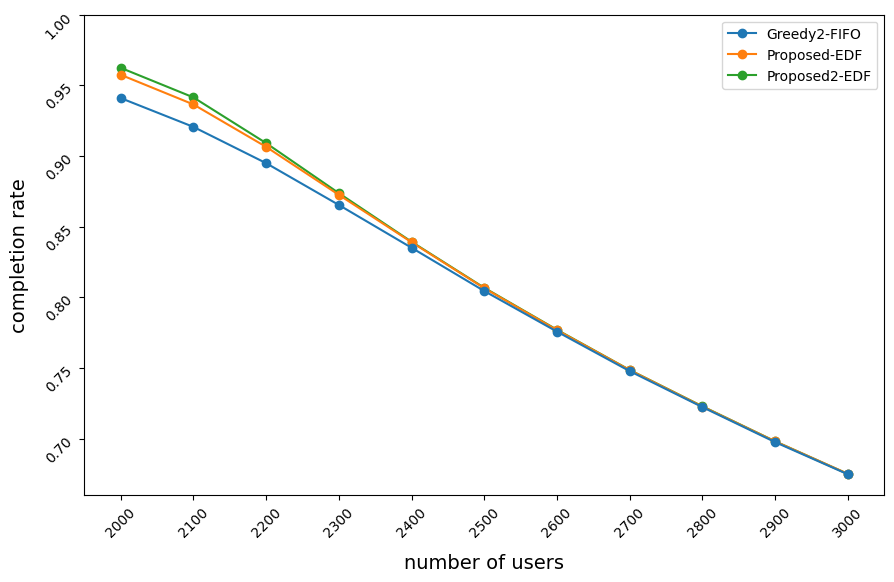

In [12]:
fig1 = plt.figure(figsize=(10,6))

columns = completion_rate_df.columns
x_values = range(len(columns))

ax1 = fig1.add_axes([0.1,0.1,0.8,0.8])
ax1.tick_params(labelrotation=45)
p1 = ax1.plot(x_values, completion_rate_df.iloc[0], marker='o', zorder=4)
# ax.plot(x_values, completion_rate_df.iloc[1], marker='o', zorder=3)
p2 = ax1.plot(x_values, completion_rate_df.iloc[2], marker='o', zorder=2)
p3 = ax1.plot(x_values, completion_rate_df.iloc[3], marker='o', zorder=1)
ax1.legend(handles=[p1[0], p2[0], p3[0]], labels=[completion_rate_df.iloc[0].name, completion_rate_df.iloc[2].name, completion_rate_df.iloc[3].name])

plt.ylabel('completion rate', labelpad=10, fontsize=14)
plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
plt.xlabel('number of users', labelpad=10, fontsize=14)
plt.xticks(x_values, columns)
# plt.title("Completion Rate", pad=20, fontsize=16)
plt.show()
fig1.savefig(f'{vec_directory}/completion_rate_graph.svg', format="svg", bbox_inches = "tight")


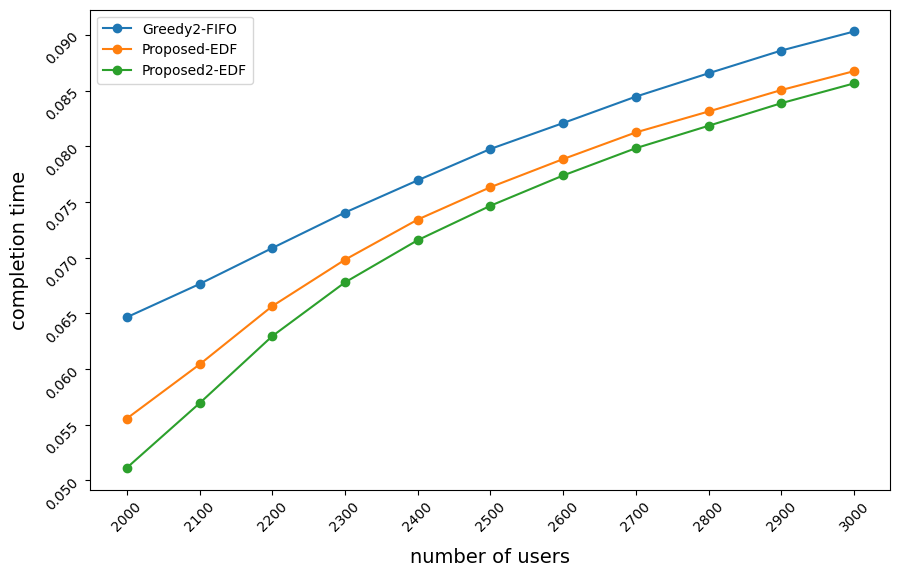

In [10]:
fig2 = plt.figure(figsize=(10,6))

columns = completion_time_df.columns
x_values = range(len(columns))

ax2 = fig2.add_axes([0.1,0.1,0.8,0.8])
ax2.tick_params(labelrotation=45)
p1 = ax2.plot(x_values, completion_time_df.iloc[0], marker='o', zorder=4)
# ax.plot(x_values, completion_time_df.iloc[1], marker='o', zorder=3)
p2 = ax2.plot(x_values, completion_time_df.iloc[2], marker='o', zorder=2)
p3 = ax2.plot(x_values, completion_time_df.iloc[3], marker='o', zorder=1)
ax2.legend(handles=[p1[0], p2[0], p3[0]], labels=[completion_time_df.iloc[0].name, completion_time_df.iloc[2].name, completion_time_df.iloc[3].name])

plt.ylabel('completion time', labelpad=10, fontsize=14)
# plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
plt.xlabel('number of users', labelpad=10, fontsize=14)
plt.xticks(x_values, columns)
# plt.title("Completion Time", pad=20, fontsize=16)
plt.show()
fig2.savefig(f'{vec_directory}/completion_time_graph.svg', format="svg", bbox_inches = "tight")



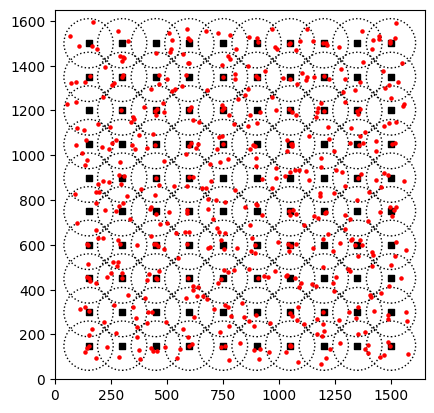

In [85]:
import matplotlib.pyplot as plt
import random
import math

def generate_random_point_in_circle(x, y, radius):
    # Generate a random angle in radians
    angle = random.uniform(0, 2 * math.pi)
    # Generate a random distance from the center (within the radius)
    distance = random.uniform(0, radius)
    # Calculate the coordinates of the point using polar coordinates
    random_x = x + distance * math.cos(angle)
    random_y = y + distance * math.sin(angle)
    return random_x, random_y

# Define the dimensions of the grid
num_rows = 10
num_columns = 10

# Define the distance between each base station
distance = 150

# Initialize lists to store x and y coordinates of base stations
base_station_x_coords = []
bast_station_y_coords = []

# Generate coordinates for each base station
for x in range(distance, (num_rows + 1) * distance, distance):
    for y in range(distance, (num_columns + 1) * distance, distance):
        base_station_x_coords.append(x)
        bast_station_y_coords.append(y)

# Plot the base stations
for x, y in zip(base_station_x_coords, bast_station_y_coords):
    plt.scatter(x, y, color='black', marker='s', s=20)
    circle = plt.Circle((x, y), 110, color='black', fill=False, linestyle='dotted')
    plt.gca().add_patch(circle)

# Generate random coordinates for users
num_users = 500  # Number of users
num_users_per_region = num_users // (num_rows * num_columns)
user_x_coords = []
user_y_coords = []
for base_station_x, base_station_y in zip(base_station_x_coords, bast_station_y_coords):
    for i in range(num_users_per_region):
        user_x, user_y = generate_random_point_in_circle(base_station_x, base_station_y, 100)
        user_x_coords.append(user_x)
        user_y_coords.append(user_y)


# Plot the users
plt.scatter(user_x_coords, user_y_coords, color='red', marker='o', s=5)

# Set labels and title
# plt.xlabel('X Axis (m)')
# plt.ylabel('Y Axis (m)')
# plt.title('Base Stations Grid with Users')

# Set aspect ratio to make the distances equal in both axes
plt.gca().set_aspect('equal', adjustable='box')

# Set x and y axes to start at 0
plt.xlim(0, (num_columns + 1) * distance)
plt.ylim(0, (num_rows + 1) * distance)

# Show the graph

plt.show()

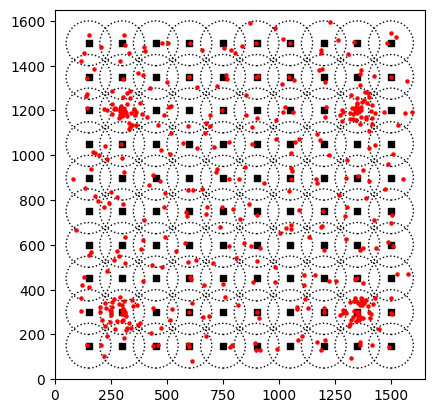

In [90]:
import matplotlib.pyplot as plt
import random
import math

def generate_random_point_in_circle(x, y, radius):
    # Generate a random angle in radians
    angle = random.uniform(0, 2 * math.pi)
    # Generate a random distance from the center (within the radius)
    distance = random.uniform(0, radius)
    # Calculate the coordinates of the point using polar coordinates
    random_x = x + distance * math.cos(angle)
    random_y = y + distance * math.sin(angle)
    return random_x, random_y

# Define the dimensions of the grid
num_rows = 10
num_columns = 10

# Define the distance between each base station
distance = 150

# Initialize lists to store x and y coordinates of base stations
base_station_x_coords = []
bast_station_y_coords = []

# Generate coordinates for each base station
for y in range(distance, (num_columns + 1) * distance, distance):
    for x in range(distance, (num_rows + 1) * distance, distance):
        base_station_x_coords.append(x)
        bast_station_y_coords.append(y)

# Plot the base stations
for x, y in zip(base_station_x_coords, bast_station_y_coords):
    plt.scatter(x, y, color='black', marker='s', s=20)
    circle = plt.Circle((x, y), 100, color='black', fill=False, linestyle='dotted')
    plt.gca().add_patch(circle)

# Generate random coordinates for users
user_x_coords = []
user_y_coords = []


num_users = 500  # Number of users
hotspot_percent = 0.3

hotspot_idx = [11,18,71,78]
hotspot_users_per_region = math.floor(num_users * hotspot_percent / len(hotspot_idx))
for idx in hotspot_idx:
    for i in range(hotspot_users_per_region):
        user_x, user_y = generate_random_point_in_circle(base_station_x_coords[idx], bast_station_y_coords[idx], 100)
        user_x_coords.append(user_x)
        user_y_coords.append(user_y)


users_per_region = math.floor(num_users * (1 - hotspot_percent) / (num_rows * num_columns))
for base_station_x, base_station_y in zip(base_station_x_coords, bast_station_y_coords):
    for i in range(users_per_region):
        user_x, user_y = generate_random_point_in_circle(base_station_x, base_station_y, 100)
        user_x_coords.append(user_x)
        user_y_coords.append(user_y)


# Plot the users
plt.scatter(user_x_coords, user_y_coords, color='red', marker='o', s=5)

# Set labels and title
# plt.xlabel('X Axis (m)')
# plt.ylabel('Y Axis (m)')
# plt.title('Base Stations Grid with Users')

# Set aspect ratio to make the distances equal in both axes
plt.gca().set_aspect('equal', adjustable='box')

# Set x and y axes to start at 0
plt.xlim(0, (num_columns + 1) * distance)
plt.ylim(0, (num_rows + 1) * distance)

# Show the graph

plt.show()